<a href="https://colab.research.google.com/github/runtorain/PythonForAI/blob/main/ImageClassificattion_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: load cifar-10 dataset and unzip it
#https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz


--2024-08-19 07:51:45--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  30.6MB/s    in 5.9s    

2024-08-19 07:51:51 (27.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
#Make datasets
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Define the paths to the CIFAR-10 batches
batch_paths = [
    '/content/cifar-10-batches-py/data_batch_1',
    '/content/cifar-10-batches-py/data_batch_2',
    '/content/cifar-10-batches-py/data_batch_3',
    '/content/cifar-10-batches-py/data_batch_4',
    '/content/cifar-10-batches-py/data_batch_5'
]
test_batch_path = '/content/cifar-10-batches-py/test_batch'

# CIFAR-10 class labels
label_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Create directories for each class
def create_class_dirs(base_dir):
    for label in label_names:
        train_dir = os.path.join(base_dir, 'train', label)
        test_dir = os.path.join(base_dir, 'test', label)
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)

# Save images to respective class folders
def save_images(data, labels, base_dir, is_test=False):
    for i, label in enumerate(labels):
        class_name = label_names[label]
        split_type = 'test' if is_test else 'train'
        class_dir = os.path.join(base_dir, split_type, class_name)
        img_array = data[i].reshape(3, 32, 32).transpose(1, 2, 0)  # Convert to (32, 32, 3)
        img_path = os.path.join(class_dir, f'{split_type}_{i}.png')
        plt.imsave(img_path, img_array)

# Load and process the training batches
def process_batches(batch_paths, base_dir):
    all_data = []
    all_labels = []
    for batch_path in batch_paths:
        batch = unpickle(batch_path)
        all_data.append(batch[b'data'])
        all_labels.extend(batch[b'labels'])

    all_data = np.vstack(all_data)
    all_labels = np.array(all_labels)

    # Split the data into train and validation (optional)
    train_data, val_data, train_labels, val_labels = train_test_split(
        all_data, all_labels, test_size=0.2, stratify=all_labels, random_state=42
    )

    # Save images
    save_images(train_data, train_labels, base_dir, is_test=False)
    save_images(val_data, val_labels, base_dir, is_test=False)  # Optionally save validation data

# Process the test batch
def process_test_batch(test_batch_path, base_dir):
    test_batch = unpickle(test_batch_path)
    test_data = test_batch[b'data']
    test_labels = test_batch[b'labels']

    # Save images
    save_images(test_data, test_labels, base_dir, is_test=True)



In [ ]:

base_dir = '/content/datasets'  # Root folder for the dataset
create_class_dirs(base_dir)
process_batches(batch_paths, base_dir)
process_test_batch(test_batch_path, base_dir)

In [ ]:
# prompt: count image file in sub dir of /content/datasets

import os

def count_images(directory):
  total_images = 0
  for root, dirs, files in os.walk(directory):
    for file in files:
      if file.endswith(('.png', '.jpg', '.jpeg')):  # Adjust file extensions as needed
        total_images += 1
  return total_images

base_dir = '/content/datasets'
image_count = count_images(base_dir)
print(f"Total images in {base_dir}: {image_count}")


Total images in /content/datasets: 59018


In [ ]:
def count_images(directory):
  total_images = 0
  for root, dirs, files in os.walk(directory):
    for file in files:
      if file.endswith(('.png', '.jpg', '.jpeg')):  # Adjust file extensions as needed
        total_images += 1
  return total_images

base_dir = '/content/datasets'
image_count = count_images(base_dir)
print(f"Total images in {base_dir}: {image_count}")

Total images in /content/datasets: 59018


In [ ]:
import os

# Define the directory where your images are stored
output_dir = '/content/datasets/test'

# Dictionary to hold the count of images in each class folder
class_counts = {}

# Iterate through each folder in the output directory
for class_name in os.listdir(output_dir):
    class_path = os.path.join(output_dir, class_name)
    if os.path.isdir(class_path):
        # Count the number of files in the directory
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = num_images

# Print the number of images in each class folder
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")


frog: 1000 images
ship: 1000 images
automobile: 1000 images
deer: 1000 images
airplane: 1000 images
dog: 1000 images
horse: 1000 images
cat: 1000 images
truck: 1000 images
bird: 1000 images


In [ ]:
# Define the directory where your images are stored
output_dir = '/content/datasets/train'

# Dictionary to hold the count of images in each class folder
class_counts = {}

# Iterate through each folder in the output directory
for class_name in os.listdir(output_dir):
    class_path = os.path.join(output_dir, class_name)
    if os.path.isdir(class_path):
        # Count the number of files in the directory
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = num_images

# Print the number of images in each class folder
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

frog: 4901 images
ship: 4886 images
automobile: 4900 images
deer: 4901 images
airplane: 4904 images
dog: 4903 images
horse: 4897 images
cat: 4917 images
truck: 4913 images
bird: 4896 images


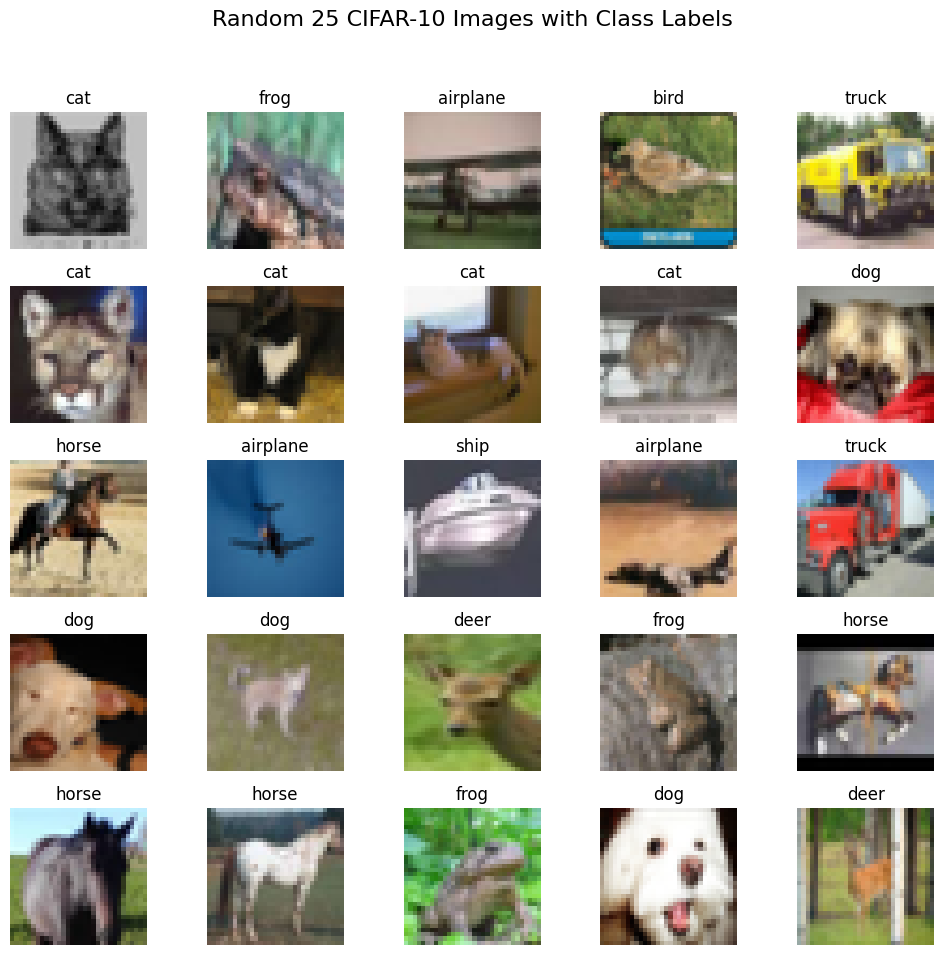

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dataset path
dataset_path = '/content/datasets/train'

# Get the class folders (folder names)
class_names = os.listdir(dataset_path)
class_names.sort()  # Sort the class names alphabetically

# Collect all images along with their class labels
image_paths = []
for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            image_paths.append((img_path, class_name))

# Randomly select 25 images
selected_images = random.sample(image_paths, 25)

# Plot the 25 images in a 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle("Random 25 CIFAR-10 Images with Class Labels", fontsize=16)

for i, ax in enumerate(axes.flat):
    img_path, class_name = selected_images[i]
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')  # Hide the axes ticks

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
plt.show()


In [ ]:
##Make function Random image
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dataset path
dataset_path = '/content/datasets/train'

def show_random_images(dataset_path='/content/datasets/train'):
  # Get the class folders (folder names)
  class_names = os.listdir(dataset_path)
  class_names.sort()  # Sort the class names alphabetically

  # Collect all images along with their class labels
  image_paths = []
  for class_name in class_names:
      class_folder = os.path.join(dataset_path, class_name)
      if os.path.isdir(class_folder):
          for img_name in os.listdir(class_folder):
              img_path = os.path.join(class_folder, img_name)
              image_paths.append((img_path, class_name))

  # Randomly select 25 images
  selected_images = random.sample(image_paths, 25)

  # Plot the 25 images in a 5x5 grid
  fig, axes = plt.subplots(5, 5, figsize=(10, 10))
  fig.suptitle("Random 25 CIFAR-10 Images with Class Labels", fontsize=16)

  for i, ax in enumerate(axes.flat):
      img_path, class_name = selected_images[i]
      img = mpimg.imread(img_path)
      ax.imshow(img)
      ax.set_title(class_name)
      ax.axis('off')  # Hide the axes ticks

  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
  plt.show()


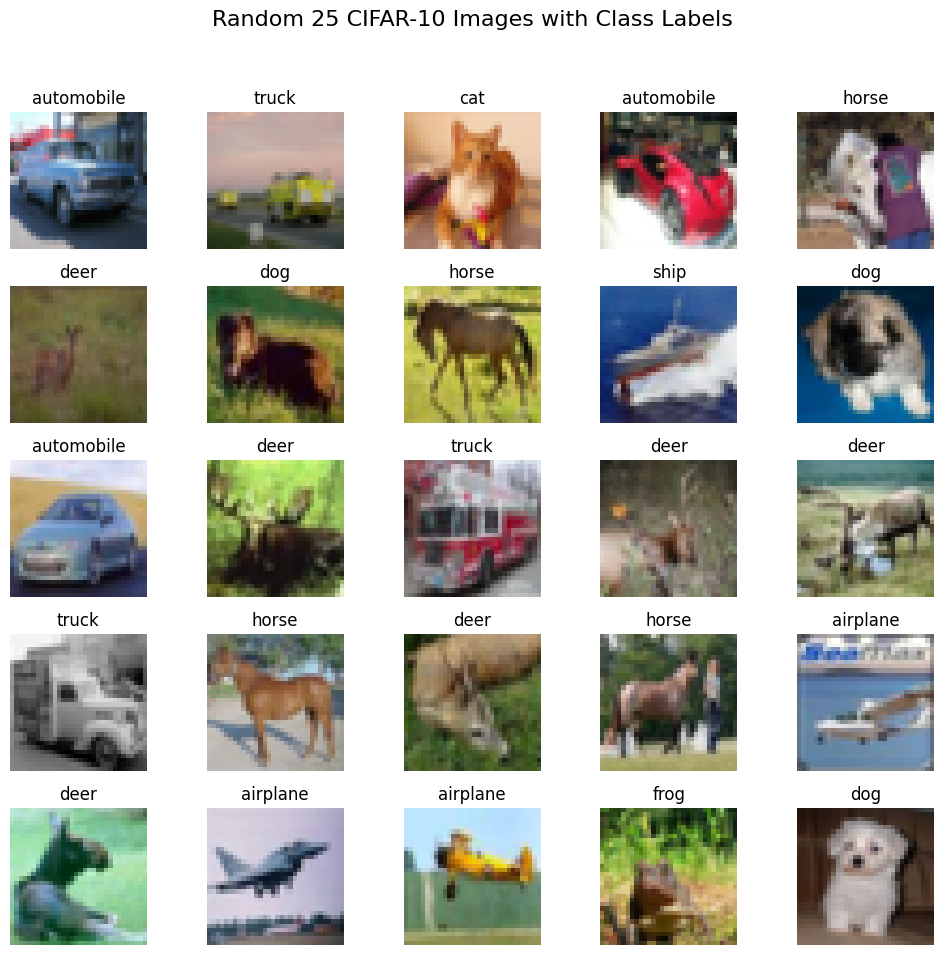

In [ ]:
show_random_images()
#

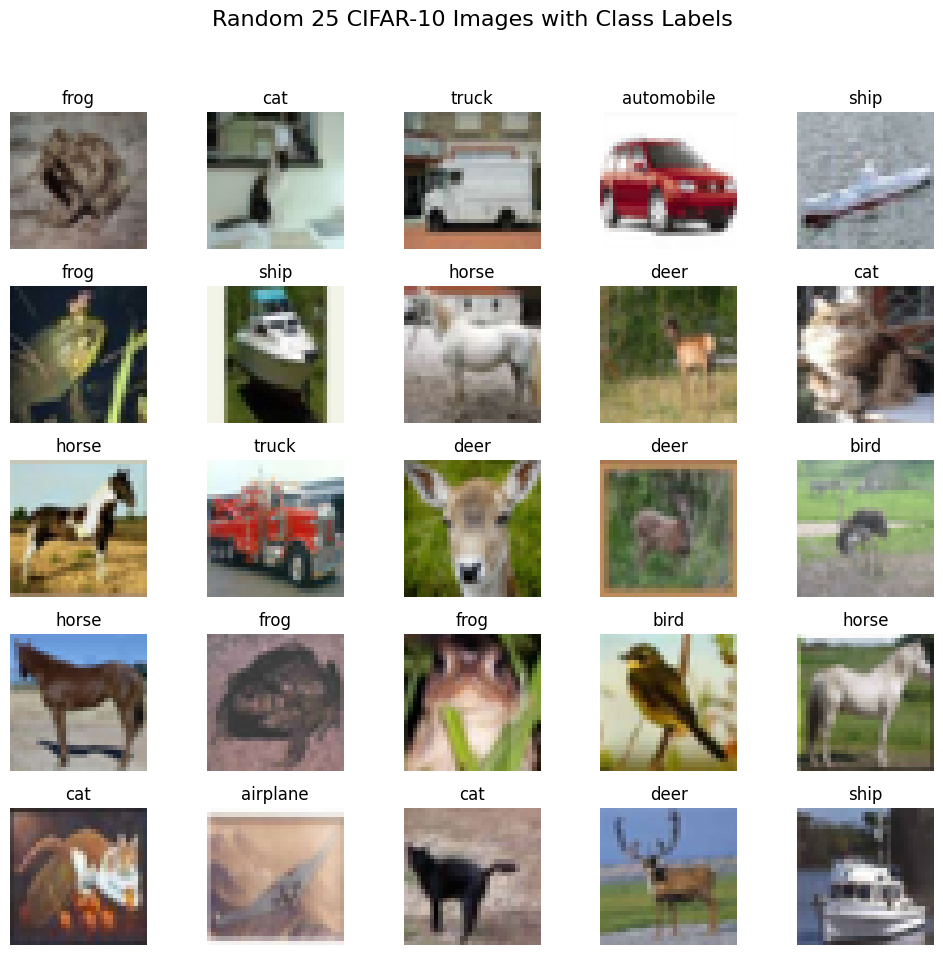

In [ ]:
show_random_images('/content/datasets/test')

## Making Model

Found 49018 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Class Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


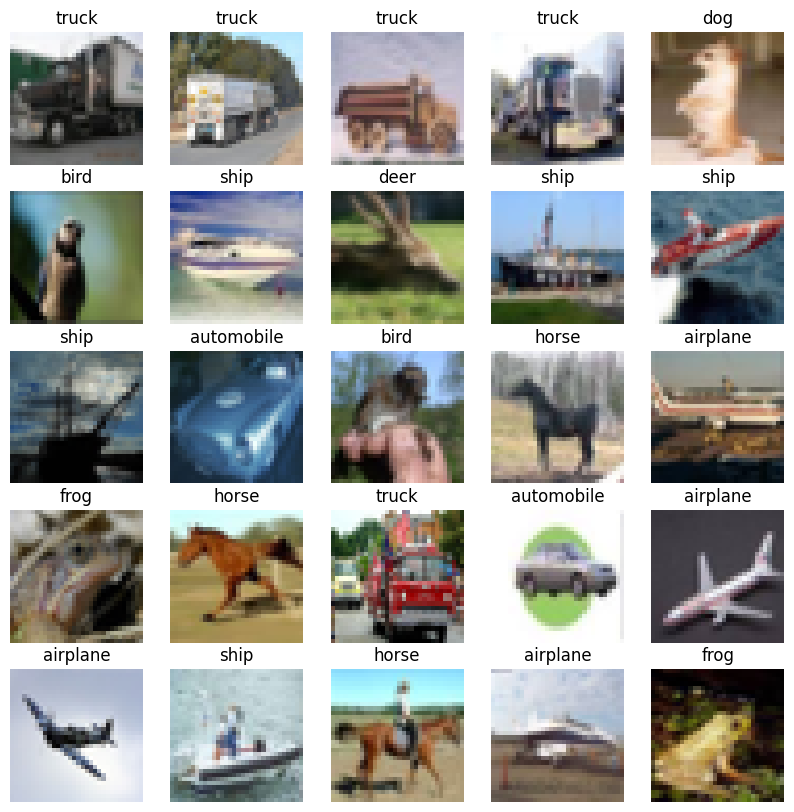

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.3529 - loss: 1.7461 - val_accuracy: 0.5505 - val_loss: 1.2533
Epoch 2/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.5862 - loss: 1.1703 - val_accuracy: 0.6343 - val_loss: 1.0323
Epoch 3/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6567 - loss: 0.9811 - val_accuracy: 0.6678 - val_loss: 0.9454
Epoch 4/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6973 - loss: 0.8603 - val_accuracy: 0.6909 - val_loss: 0.8863
Epoch 5/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7341 - loss: 0.7690 - val_accuracy: 0.6954 - val_loss: 0.8871
Epoch 6/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7568 - loss: 0.6980 - val_accuracy: 0.7025 - val_loss: 0.8787
Epoch 7/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7789 - loss: 0.6314 - val_accuracy: 0.7081 - val_loss: 0.8906
Epoch 8/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7979 - loss: 

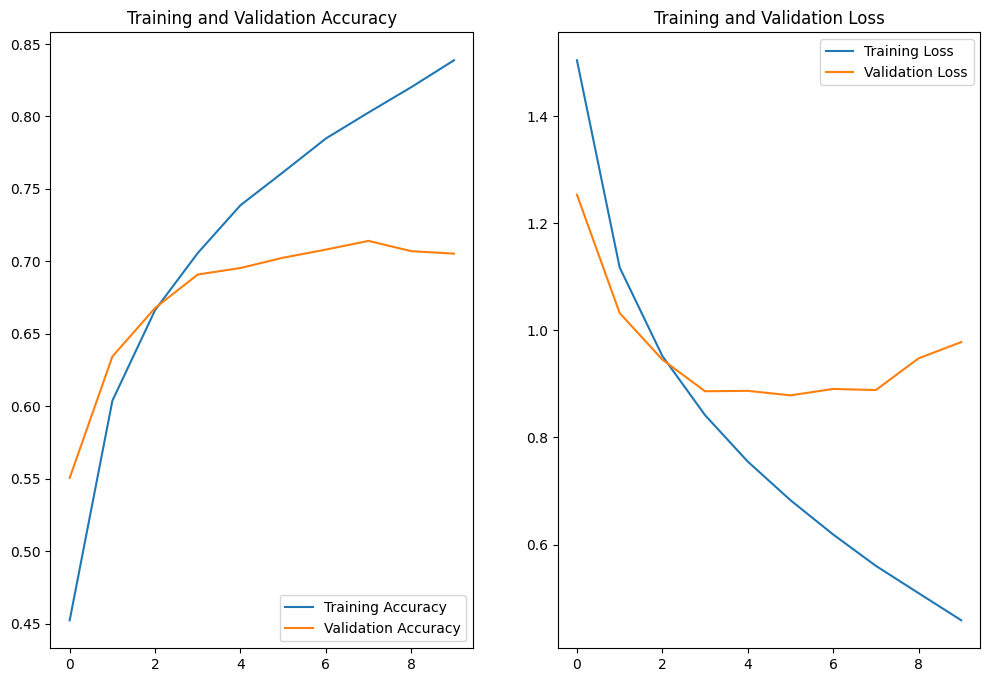

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7122 - loss: 0.9690
Test Accuracy: 0.7053


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set the paths to the dataset
train_dir = '/content/datasets/train'
test_dir = '/content/datasets/test'

# Load the training and testing datasets
batch_size = 32
img_height = 32
img_width = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Class names
class_names = train_ds.class_names
print("Class Names:", class_names)

# Visualize some images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Normalize the data (rescale pixel values)
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Model summary
model.summary()

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

# Plot training and validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
Predicted Class: airplane
Class Probabilities: [9.9984264e-01 6.8726904e-12 1.5722937e-04 3.4925880e-09 2.2103697e-09
 7.5869470e-11 1.1996118e-08 2.0005830e-11 1.1345555e-07 3.4066458e-11]


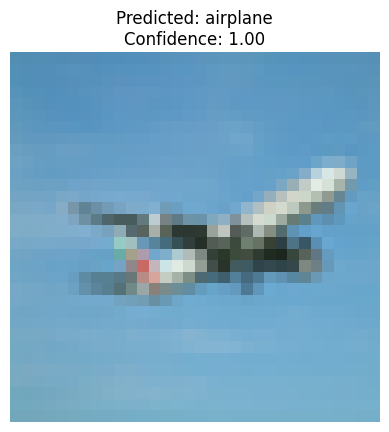

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to the image you want to predict
img_path = '/content/datasets/test/airplane/test_1010.png'

# Load the image and preprocess it
img = image.load_img(img_path, target_size=(32, 32))  # Resize to 32x32 as required by the model
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 32, 32, 3)
img_array = img_array / 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
predicted_class_idx = np.argmax(predictions[0])  # Get the index of the highest probability class
predicted_class_name = class_names[predicted_class_idx]  # Get the class name

# Print the prediction and probabilities
print(f"Predicted Class: {predicted_class_name}")
print(f"Class Probabilities: {predictions[0]}")

# Visualize the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}\nConfidence: {predictions[0][predicted_class_idx]:.2f}")
plt.axis('off')
plt.show()


In [ ]:
def predict_image(img_path):
  # Load the image and preprocess it
  img = image.load_img(img_path, target_size=(32, 32))  # Resize to 32x32 as required by the model
  img_array = image.img_to_array(img)  # Convert the image to an array
  img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 32, 32, 3)
  img_array = img_array / 255.0  # Normalize the image

  # Predict the class
  predictions = model.predict(img_array)
  predicted_class_idx = np.argmax(predictions[0])  # Get the index of the highest probability class
  predicted_class_name = class_names[predicted_class_idx]  # Get the class name

  # Print the prediction and probabilities
  print(f"Predicted Class: {predicted_class_name}")
  print(f"Class Probabilities: {predictions[0]}")

  # Visualize the image and prediction
  plt.imshow(img)
  plt.title(f"Predicted: {predicted_class_name}\nConfidence: {predictions[0][predicted_class_idx]:.2f}")
  plt.axis('off')
  plt.show()

In [ ]:
import os

# Directory path
test_dir = '/content/datasets/test'

# List to store all image paths
image_list = []

# Traverse through all subdirectories and collect image paths
for root, dirs, files in os.walk(test_dir):
    for file in files:
        # Check if the file is an image (you can modify this check based on your image formats)
        if file.endswith(('png', 'jpg', 'jpeg')):
            # Get the full file path
            file_path = os.path.join(root, file)
            image_list.append(file_path)

# # Print all image paths (optional)
# for img_path in image_list:
#     print(img_path)

# If you want to see the list in code:
print(f"Total images found: {len(image_list)}")


Total images found: 10000


In [ ]:
image_list[:10]

['/content/datasets/test/frog/test_8932.png',
 '/content/datasets/test/frog/test_9531.png',
 '/content/datasets/test/frog/test_1781.png',
 '/content/datasets/test/frog/test_4700.png',
 '/content/datasets/test/frog/test_2299.png',
 '/content/datasets/test/frog/test_9400.png',
 '/content/datasets/test/frog/test_4007.png',
 '/content/datasets/test/frog/test_8291.png',
 '/content/datasets/test/frog/test_8273.png',
 '/content/datasets/test/frog/test_8755.png']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class: airplane
Class Probabilities: [9.9851447e-01 1.1184825e-17 1.4698985e-03 1.5546409e-05 3.0757650e-11
 7.6692874e-10 1.0086728e-08 7.7937129e-11 1.1710454e-12 9.7785772e-16]


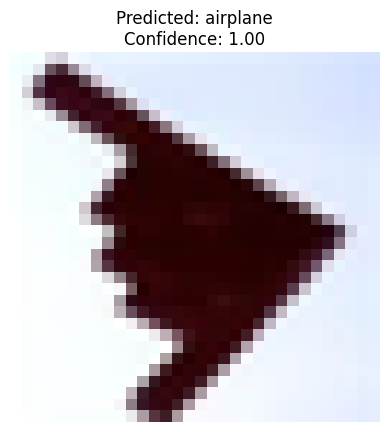

In [ ]:
# Randomly select an image from the list
random_image_path = random.choice(image_list)

# Call the predict_image function on the randomly selected image
predict_image(random_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class: bird
Class Probabilities: [1.0137688e-01 1.3035288e-11 7.1749997e-01 1.6722896e-03 5.2484675e-06
 3.5187587e-04 1.7767978e-01 1.4799664e-06 1.4121846e-03 4.3376900e-07]


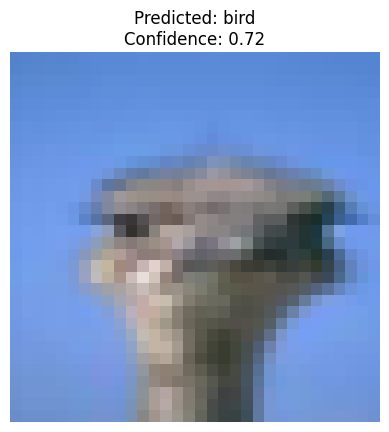

In [ ]:
# Randomly select an image from the list
random_image_path = random.choice(image_list)
# Call the predict_image function on the randomly selected image
predict_image(random_image_path)

/content/datasets/test/automobile/test_4271.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Class: automobile
Class Probabilities: [2.1181183e-03 9.9476939e-01 1.0307421e-06 4.5944307e-06 1.0088746e-08
 7.2497204e-07 1.9459888e-08 1.7401835e-07 4.7137734e-04 2.6345919e-03]


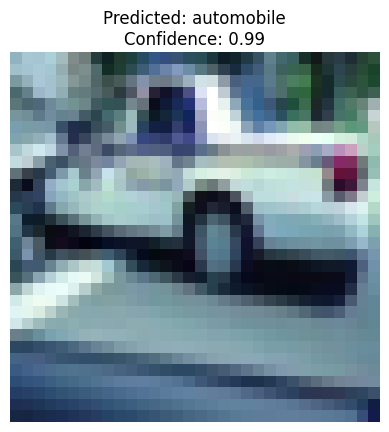

In [ ]:
# Randomly select an image from the list
random_image_path = random.choice(image_list)
print(random_image_path)
# Call the predict_image function on the randomly selected image
predict_image(random_image_path)

/content/datasets/test/airplane/test_9724.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Class: airplane
Class Probabilities: [9.9991941e-01 2.8805418e-09 5.1607189e-05 3.7642494e-06 6.4674900e-08
 2.0498469e-08 2.2781620e-05 2.6398040e-11 2.2496297e-06 3.6034443e-08]


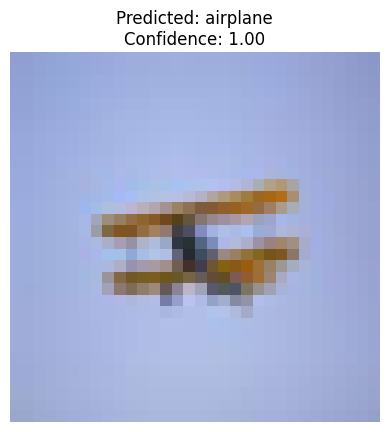

In [ ]:
# Randomly select an image from the list
random_image_path = random.choice(image_list)
print(random_image_path)
# Call the predict_image function on the randomly selected image
predict_image(random_image_path)

/content/datasets/test/automobile/test_8751.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class: airplane
Class Probabilities: [7.4578476e-01 1.8562639e-02 3.2287519e-02 2.7334711e-03 5.5215554e-04
 1.9055706e-03 4.5953050e-02 2.0046514e-06 1.4734620e-01 4.8726113e-03]


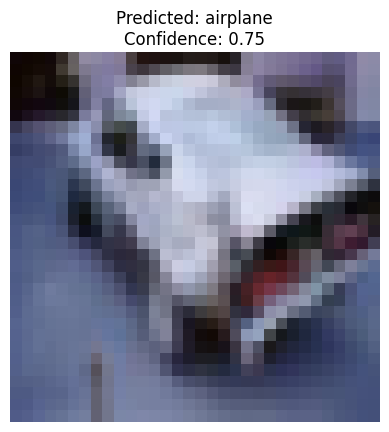

In [ ]:
# Randomly select an image from the list
random_image_path = random.choice(image_list)
print(random_image_path)
# Call the predict_image function on the randomly selected image
predict_image(random_image_path)

## Use Pretrain Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Load the pretrained model (VGG16)
# We exclude the top (fully connected) layers by setting `include_top=False`
base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

# Freeze the base model (we don't want to update the weights of the pretrained layers)
base_model.trainable = False

# Add new fully connected layers on top of the base model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # New dense layer
    layers.Dropout(0.5),  # Add dropout to reduce overfitting
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (CIFAR-10)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and test data
train_dir = '/content/datasets/train'
test_dir = '/content/datasets/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse'  # Use 'sparse' since CIFAR-10 labels are integers
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Increase the epochs if needed
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


ValueError: Undefined shapes are not supported.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pretrained VGG16 model without the top layers
base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of it
model = models.Sequential([
    base_model,  # Add the pretrained base model
    layers.Flatten(),  # Flatten the output from the base model
    layers.Dense(256, activation='relu'),  # Add a fully connected layer
    layers.Dropout(0.5),  # Add dropout to reduce overfitting
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and test data
train_dir = '/content/datasets/train'
test_dir = '/content/datasets/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse'  # Use 'sparse' since CIFAR-10 labels are integers
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Increase the epochs if needed
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")


ValueError: Undefined shapes are not supported.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pretrained VGG16 model with input shape (224, 224, 3)
# and exclude the top layers (include_top=False)
base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of it
model = models.Sequential([
    base_model,  # Add the pretrained base model
    layers.Flatten(),  # Flatten the output from the base model
    layers.Dense(256, activation='relu'),  # Add a fully connected layer
    layers.Dropout(0.5),  # Add dropout to reduce overfitting
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and test data
train_dir = '/content/datasets/train'
test_dir = '/content/datasets/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust to match the input size expected by VGG16
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Adjust to match the input size expected by VGG16
    batch_size=32,
    class_mode='sparse'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Increase the epochs if needed
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")


ValueError: Undefined shapes are not supported.